# Data Scource From the kaggle <br>

https://www.kaggle.com/c/digit-recognizer/data
<br><Br>
MNIST digit recognition test <br>




In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dnn_app_utils_v2 import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

CLASS_NUMBER = 10

In [2]:
def load_data(): 
    
    df_train = pd.read_csv('./data/train.csv')
    X_test = pd.read_csv('./data/test.csv')
    
    y_train = df_train['label']
    X_train = df_train.drop('label', axis=1)
    
    return X_train, X_test, y_train


X_train, X_test, y_train = load_data()

Label : 0


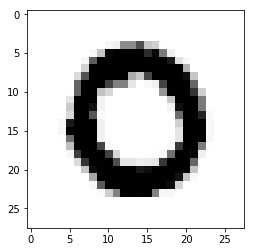

In [3]:
ImageDisplay(X_train.ix[1].tolist(), y_train[1])

In [4]:
y_train_one_hot = one_hot_encoding(y_train)

In [10]:

def L_layer_model(X, Y, X_valid, Y_valid, layers_dims, prev_param, learning_rate = 0.0075,\
                  num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                      # keep track of cost
    train_acc = []
    test_acc = []
    
    # Parameters initialization.
#    parameters = initialize_parameters_deep(layers_dims)
    parameters = prev_param
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
#        print (AL.shape)
#        print (AL[:,0])
#        print (np.sum(AL[:,0]))
        
        # Compute cost.
        cost = compute_cost(AL, Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            acc, y_predict = cal_accuracy(X, Y, parameters)
            acc_val, y_predict_val = cal_accuracy(X_valid, Y_valid, parameters)
            print ("Train Acc : %0.3f"%(acc*100)+"%")
            print ("Valid Acc : %0.3f"%(acc_val*100)+"%")
        if print_cost and i % 100 == 0:
            test_acc.append(acc_val)
            train_acc.append(acc)
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters, costs, train_acc, test_acc


In [6]:
scaler = StandardScaler()
scaler.fit(X_train[:40000])
X_train_scaled = scaler.transform(X_train[:40000])
X_valid_scaled = scaler.transform(X_train[40000:])
print (X_train_scaled.shape)
print (X_valid_scaled.shape)

(40000, 784)
(2000, 784)


(784, 40000)
Cost after iteration 0: 3.336943
Train Acc : 8.737%
Valid Acc : 9.100%
Cost after iteration 100: 3.250650
Train Acc : 12.993%
Valid Acc : 12.950%
Cost after iteration 200: 3.176589
Train Acc : 17.453%
Valid Acc : 17.850%
Cost after iteration 300: 3.108404
Train Acc : 21.723%
Valid Acc : 21.450%
Cost after iteration 400: 3.042567
Train Acc : 26.265%
Valid Acc : 25.550%
Cost after iteration 500: 2.977014
Train Acc : 31.175%
Valid Acc : 31.400%
Cost after iteration 600: 2.910460
Train Acc : 36.195%
Valid Acc : 36.500%
Cost after iteration 700: 2.842388
Train Acc : 40.990%
Valid Acc : 42.050%
Cost after iteration 800: 2.772457
Train Acc : 45.553%
Valid Acc : 46.000%
Cost after iteration 900: 2.700622
Train Acc : 49.755%
Valid Acc : 50.000%
Cost after iteration 1000: 2.626667
Train Acc : 53.715%
Valid Acc : 53.500%
Cost after iteration 1100: 2.550942
Train Acc : 57.163%
Valid Acc : 56.500%
Cost after iteration 1200: 2.474797
Train Acc : 59.760%
Valid Acc : 59.450%
Cost after it

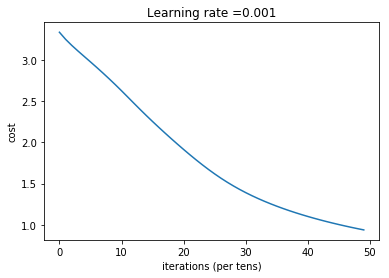

In [8]:


train_X = X_train_scaled.T
train_y = y_train_one_hot[:40000].T

valid_X = X_valid_scaled.T
valid_y = y_train_one_hot[40000:].T

print (train_X.shape)

layers_dims = [train_X.shape[0], 50, 20, CLASS_NUMBER] #  5-layer model

parameters, costs, train_acc, test_acc = L_layer_model(train_X, train_y, valid_X, valid_y, \
                  layers_dims, learning_rate = 0.001,\
                  num_iterations = 5000, print_cost=True)

In [9]:
prev_param = parameters

Cost after iteration 0: 0.923571
Train Acc : 84.977%
Valid Acc : 84.000%
Cost after iteration 100: 0.909483
Train Acc : 85.220%
Valid Acc : 84.050%
Cost after iteration 200: 0.895930
Train Acc : 85.420%
Valid Acc : 84.250%
Cost after iteration 300: 0.882888
Train Acc : 85.688%
Valid Acc : 84.750%
Cost after iteration 400: 0.870302
Train Acc : 85.918%
Valid Acc : 85.100%
Cost after iteration 500: 0.858166
Train Acc : 86.125%
Valid Acc : 85.200%
Cost after iteration 600: 0.846460
Train Acc : 86.325%
Valid Acc : 85.400%
Cost after iteration 700: 0.835156
Train Acc : 86.465%
Valid Acc : 85.600%
Cost after iteration 800: 0.824225
Train Acc : 86.633%
Valid Acc : 85.650%
Cost after iteration 900: 0.813660
Train Acc : 86.820%
Valid Acc : 85.900%
Cost after iteration 1000: 0.803443
Train Acc : 86.980%
Valid Acc : 86.100%
Cost after iteration 1100: 0.793560
Train Acc : 87.140%
Valid Acc : 86.250%
Cost after iteration 1200: 0.784002
Train Acc : 87.310%
Valid Acc : 86.350%
Cost after iteration 130

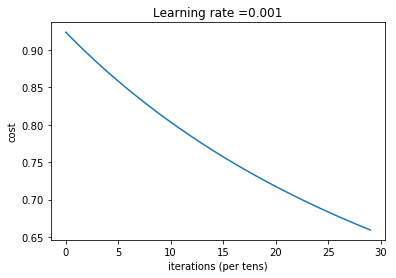

In [11]:
parameters, costs, train_acc, test_acc = L_layer_model(train_X, train_y, valid_X, valid_y, \
                  layers_dims, prev_param, learning_rate = 0.001,\
                  num_iterations = 3000, print_cost=True)

In [12]:
prev_param = parameters

Cost after iteration 0: 0.653835
Train Acc : 89.188%
Valid Acc : 88.100%
Cost after iteration 100: 0.645720
Train Acc : 89.325%
Valid Acc : 88.150%
Cost after iteration 200: 0.637910
Train Acc : 89.425%
Valid Acc : 88.200%
Cost after iteration 300: 0.630395
Train Acc : 89.518%
Valid Acc : 88.250%
Cost after iteration 400: 0.623159
Train Acc : 89.612%
Valid Acc : 88.400%
Cost after iteration 500: 0.616190
Train Acc : 89.730%
Valid Acc : 88.500%
Cost after iteration 600: 0.609468
Train Acc : 89.833%
Valid Acc : 88.600%
Cost after iteration 700: 0.602989
Train Acc : 89.890%
Valid Acc : 88.650%
Cost after iteration 800: 0.596733
Train Acc : 89.970%
Valid Acc : 88.650%
Cost after iteration 900: 0.590687
Train Acc : 90.065%
Valid Acc : 88.850%
Cost after iteration 1000: 0.584844
Train Acc : 90.140%
Valid Acc : 89.000%
Cost after iteration 1100: 0.579197
Train Acc : 90.210%
Valid Acc : 89.100%
Cost after iteration 1200: 0.573726
Train Acc : 90.300%
Valid Acc : 89.200%
Cost after iteration 130

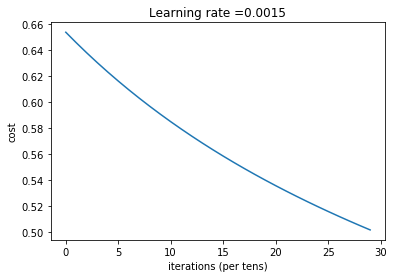

In [13]:
parameters, costs, train_acc, test_acc = L_layer_model(train_X, train_y, valid_X, valid_y, \
                  layers_dims, prev_param, learning_rate = 0.0015,\
                  num_iterations = 3000, print_cost=True)

Cost after iteration 0: 0.498045
Train Acc : 91.492%
Valid Acc : 90.600%
Cost after iteration 100: 0.496398
Train Acc : 91.530%
Valid Acc : 90.600%
Cost after iteration 200: 0.494768
Train Acc : 91.535%
Valid Acc : 90.700%
Cost after iteration 300: 0.493157
Train Acc : 91.555%
Valid Acc : 90.700%
Cost after iteration 400: 0.491563
Train Acc : 91.567%
Valid Acc : 90.700%
Cost after iteration 500: 0.489985
Train Acc : 91.605%
Valid Acc : 90.700%
Cost after iteration 600: 0.488424
Train Acc : 91.625%
Valid Acc : 90.700%
Cost after iteration 700: 0.486877
Train Acc : 91.655%
Valid Acc : 90.700%
Cost after iteration 800: 0.485346
Train Acc : 91.675%
Valid Acc : 90.750%
Cost after iteration 900: 0.483830
Train Acc : 91.712%
Valid Acc : 90.750%
Cost after iteration 1000: 0.482331
Train Acc : 91.740%
Valid Acc : 90.750%
Cost after iteration 1100: 0.480846
Train Acc : 91.755%
Valid Acc : 90.750%
Cost after iteration 1200: 0.479376
Train Acc : 91.787%
Valid Acc : 90.800%
Cost after iteration 130

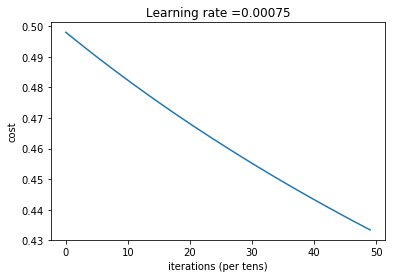

In [52]:
prev_param = parameters
parameters, costs, train_acc, test_acc = L_layer_model(train_X, train_y, valid_X, valid_y, \
                  layers_dims, prev_param, learning_rate = 0.00075,\
                  num_iterations = 5000, print_cost=True)


Cost after iteration 0: 0.432333
Train Acc : 92.555%
Valid Acc : 91.500%
Cost after iteration 100: 0.430659
Train Acc : 92.588%
Valid Acc : 91.550%
Cost after iteration 200: 0.429006
Train Acc : 92.605%
Valid Acc : 91.600%
Cost after iteration 300: 0.427372
Train Acc : 92.635%
Valid Acc : 91.550%
Cost after iteration 400: 0.425758
Train Acc : 92.655%
Valid Acc : 91.550%
Cost after iteration 500: 0.424161
Train Acc : 92.692%
Valid Acc : 91.550%
Cost after iteration 600: 0.422581
Train Acc : 92.720%
Valid Acc : 91.500%
Cost after iteration 700: 0.421020
Train Acc : 92.740%
Valid Acc : 91.550%
Cost after iteration 800: 0.419475
Train Acc : 92.773%
Valid Acc : 91.600%
Cost after iteration 900: 0.417946
Train Acc : 92.797%
Valid Acc : 91.650%
Cost after iteration 1000: 0.416434
Train Acc : 92.832%
Valid Acc : 91.700%
Cost after iteration 1100: 0.414941
Train Acc : 92.873%
Valid Acc : 91.750%
Cost after iteration 1200: 0.413463
Train Acc : 92.892%
Valid Acc : 91.750%
Cost after iteration 130

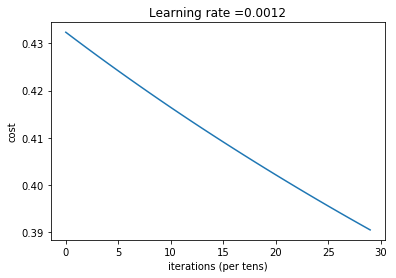

In [58]:
prev_param = parameters
parameters, costs, train_acc, test_acc = L_layer_model(train_X, train_y, valid_X, valid_y, \
                  layers_dims, prev_param, learning_rate = 0.0012,\
                  num_iterations = 3000, print_cost=True)


In [67]:
acc, y_predict = cal_accuracy(train_X, train_y, parameters)
acc

0.9338

In [68]:
acc, y_predict = cal_accuracy(valid_X, valid_y, parameters)
acc

0.9215